In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files 
uploaded= files.upload ()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (1).csv


In [ ]:
data=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [ ]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
data0=data.copy()

In [ ]:
data0=data0.drop(columns=["DEATH_EVENT"])

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# this is an optional step
df_st =  StandardScaler().fit_transform(data0)  
pd.DataFrame(df_st, columns=data0.columns).head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879


In [ ]:
pca_out = PCA(n_components=5).fit(df_st)

In [ ]:
# get the component variance
# Proportion of Variance (from PC1 to PC6)
pca_out.explained_variance_ratio_

array([0.13858049, 0.13159129, 0.10567855, 0.09299485, 0.0858236 ])

In [ ]:
# Cumulative proportion of variance (from PC1 to PC6)   
np.cumsum(pca_out.explained_variance_ratio_)

array([0.13858049, 0.27017178, 0.37585032, 0.46884517, 0.55466877,
       0.63707509, 0.71068826, 0.78112898, 0.84479713, 0.90378138])

In [ ]:
# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = data0.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5
variable,,,,,
age,0.049101,0.490932,-0.182108,0.062674,0.197514
anaemia,-0.228183,0.320464,-0.150436,-0.414443,-0.209261
creatinine_phosphokinase,0.162765,-0.230922,0.083985,0.481709,0.510700
diabetes,-0.284697,-0.151578,0.389240,0.151390,-0.280351
ejection_fraction,-0.261812,-0.046662,-0.443315,-0.027672,0.354845
high_blood_pressure,-0.190256,0.265189,-0.229776,0.413401,-0.312492
platelets,-0.170213,-0.157016,-0.124557,0.508584,-0.270750
serum_creatinine,0.037199,0.403600,0.269003,0.047074,0.402813
serum_sodium,-0.093538,-0.240871,-0.625528,-0.018298,0.102886


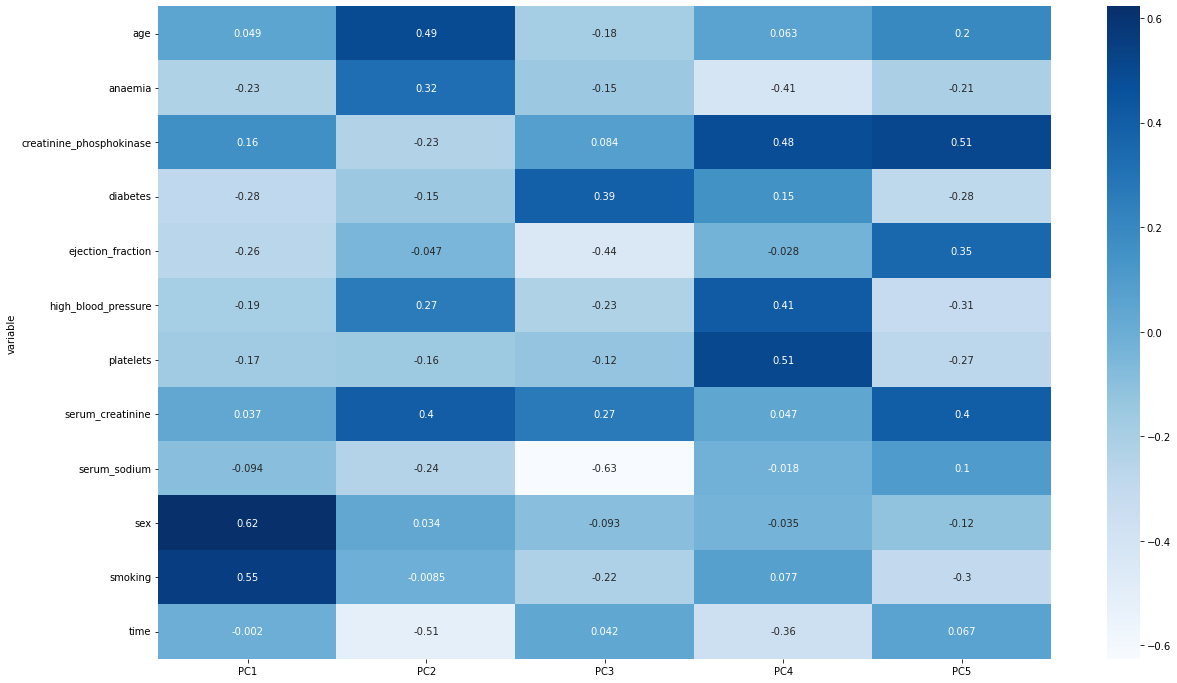

In [ ]:
# get correlation matrix plot for loadings
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
ax = sns.heatmap(loadings_df, annot=True, cmap='Blues')
plt.show()

In [ ]:
loadings_df[(loadings_df["PC1"]>0.4)|(loadings_df["PC1"]<=-0.4)]["PC1"]

variable
sex        0.622376
smoking    0.553870
Name: PC1, dtype: float64

In [ ]:
abs(loadings_df["PC1"]).mean()

0.21907664404719596

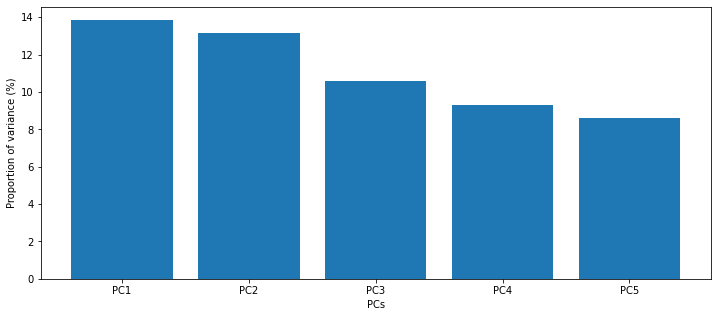

In [ ]:
plt.figure(figsize=(12,5))
plt.bar(loadings_df.columns,pca_out.explained_variance_ratio_*100)
plt.ylabel("Proportion of variance (%)")
plt.xlabel("PCs")
plt.show()

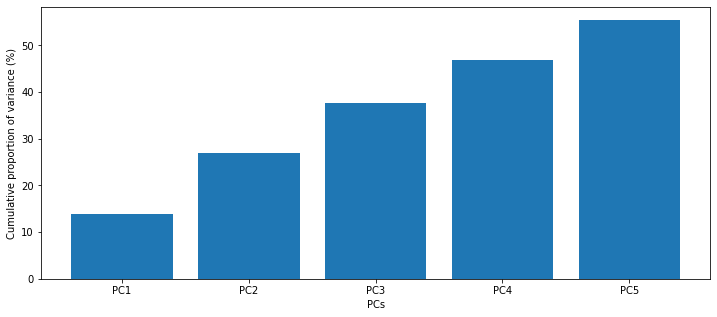

In [ ]:
plt.figure(figsize=(12,5))
plt.bar(loadings_df.columns,np.cumsum(pca_out.explained_variance_ratio_*100))
plt.ylabel("Cumulative proportion of variance (%)")
plt.xlabel("PCs")
plt.show()

In [ ]:
# get eigenvalues (variance explained by each PC)  
pca_out.explained_variance_ratio_.cumsum()

array([0.13858049, 0.27017178, 0.37585032, 0.46884517, 0.55466877])

In [ ]:
! pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


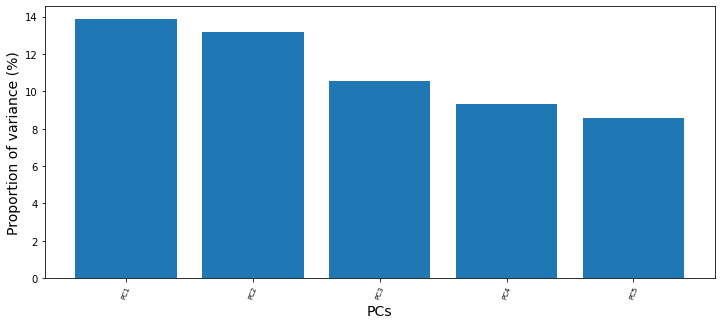

In [ ]:
# get scree plot (for scree or elbow test)
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[loadings_df.columns,pca_out.explained_variance_ratio_],show=True,dim=(12,5),axlabelfontsize=14,)
plt.show()
# Scree plot will be saved in the same directory with name screeplot.png

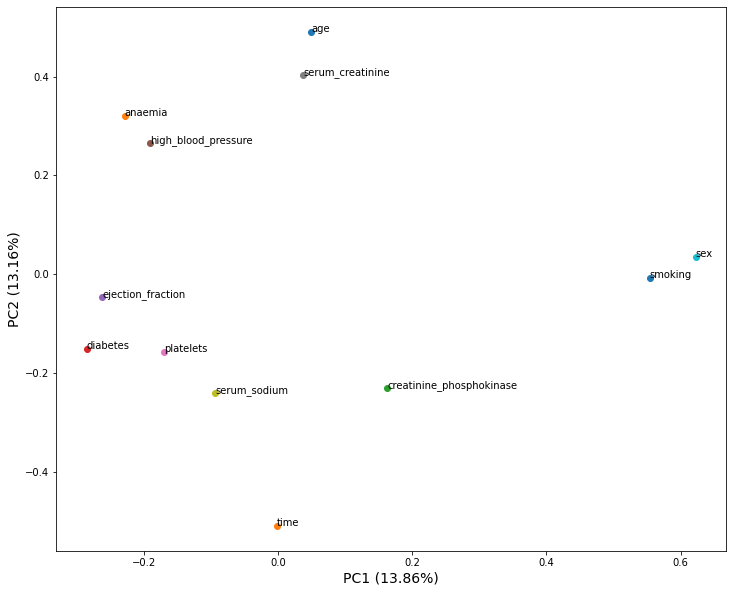

In [ ]:
# get PCA loadings plots (2D and 3D)
# 2D
cluster.pcaplot(x=loadings[0], y=loadings[1], labels=data0.columns.values,
                show=True,dim=(12,10),axlabelfontsize=14,
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

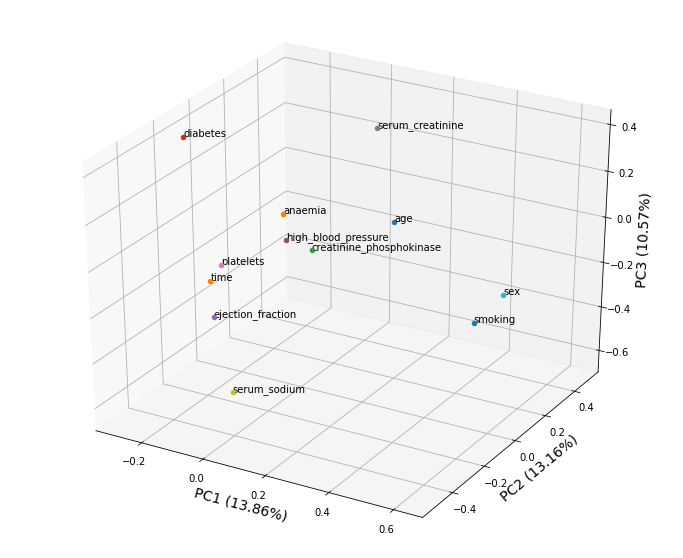

In [ ]:
# 3D
cluster.pcaplot(x=loadings[0], y=loadings[1], z=loadings[2],  labels=data0.columns.values, 
                show=True,dim=(12,10),axlabelfontsize=14,
                var1=round(pca_out.explained_variance_ratio_[0]*100, 2), 
                var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
                var3=round(pca_out.explained_variance_ratio_[2]*100, 2))

In [ ]:
# get PC scores
pca_scores = PCA().fit_transform(df_st)

In [ ]:
cmap=plt.cm.Spectral
norm=plt.Normalize(vmin=0,vmax=1)

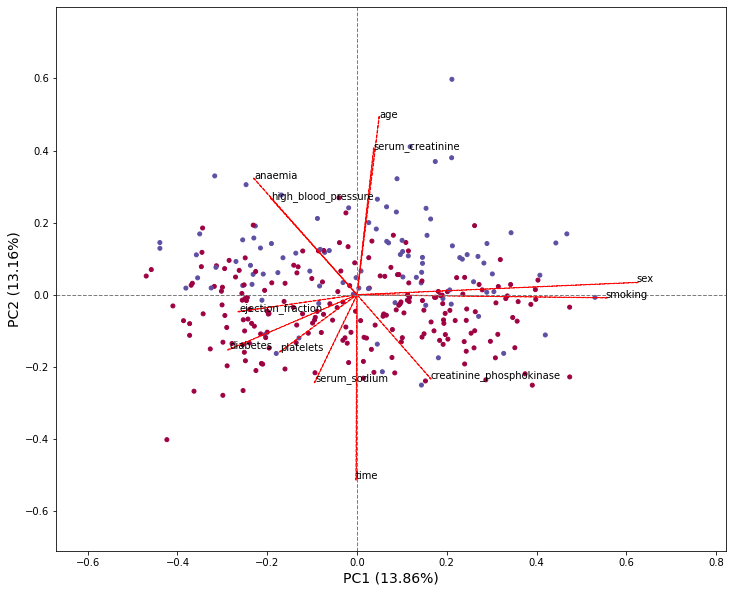

In [ ]:
# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=data0.columns.values,dotsize=16,
               colordot=cmap(norm(data["DEATH_EVENT"])),arrowcolor='r',arrowlinewidth=0.9,arrowlinestyle='--',show=True,dim=(12,10),axlabelfontsize=14,
               var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
               var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

In [ ]:
import statsmodels.api as sm

In [ ]:
X=data[["sex","smoking","ejection_fraction","platelets","diabetes"]]
Y=data["DEATH_EVENT"]

In [ ]:
#X=sm.add_constant(X) # adding a constant


In [ ]:
model=sm.OLS(Y,X).fit()
predictions=model.predict(X)


In [ ]:
print_model=model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:            DEATH_EVENT   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     4.789
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           0.000319
Time:                        20:16:53   Log-Likelihood:                -184.78
No. Observations:                 299   AIC:                             381.6
Df Residuals:                     293   BIC:                             403.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.8118      0.12

CONCLUSION: DEACUERDO  AL VALOR DEL R CUADRADO QUE FUE DEL 7.6% NO PUDO  ESTIMAR LA FUERZA DE RELACION  ENTRE MODELO Y LAS VARIABLES, EN CUAL LAS VARIABLES INDIPENDIENTE NO SE RELACIONA CON  CON LA VARIABLE DEPENDIENTE 